In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
aapl=pd.read_csv("AAPL_Dataset.csv")


In [5]:

apple=pd.read_csv("AAPL_Dataset.csv")


In [143]:
apple['Close/Last'] = apple['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['Open'] = apple['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['High'] = apple['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['Low'] = apple['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

apple['Close/Last'] = apple['Close/Last'].apply(lambda x : float(x))
apple['Open'] = apple['Open'].apply(lambda x :float(x))
apple['High'] = apple['High'].apply(lambda x :float(x))
apple['Low'] = apple['Low'].apply(lambda x : float(x))

apple = round(apple,2)
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/16/2021,146.39,93251430,148.46,149.76,145.88
1,07/15/2021,148.48,106820300,149.24,150.00,147.09
2,07/14/2021,149.15,127050800,148.10,149.57,147.68
3,07/13/2021,145.64,100827100,144.03,147.46,143.63
4,07/12/2021,144.50,76299720,146.21,146.32,144.00


In [62]:
apple_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    0 non-null      object 
 1   Close   0 non-null      float64
 2   Open    0 non-null      float64
 3   High    0 non-null      float64
 4   Low     0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 132.0+ bytes


In [63]:
apple.describe()

,Volume
count,1.259000e+03
mean,1.256308e+08
std,5.728800e+07
min,4.544820e+07
25%,8.793082e+07
50%,1.096822e+08
75%,1.454939e+08
max,4.473492e+08


In [131]:
apple.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-16,146.39,93251430,148.46,149.76,145.88
2021-07-15,148.48,106820300,149.24,150.00,147.09
2021-07-14,149.15,127050800,148.10,149.57,147.68
2021-07-13,145.64,100827100,144.03,147.46,143.63
2021-07-12,144.50,76299720,146.21,146.32,144.00


In [77]:
apple.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/22/2016,24.66,112872960,24.82,24.82,24.58
1255,07/21/2016,24.86,130760320,24.96,25.25,24.78
1256,07/20/2016,24.99,104876440,25.00,25.12,24.93
1257,07/19/2016,24.97,95065440,24.89,25.00,24.84
1258,07/18/2016,24.96,145858120,24.68,25.03,24.65


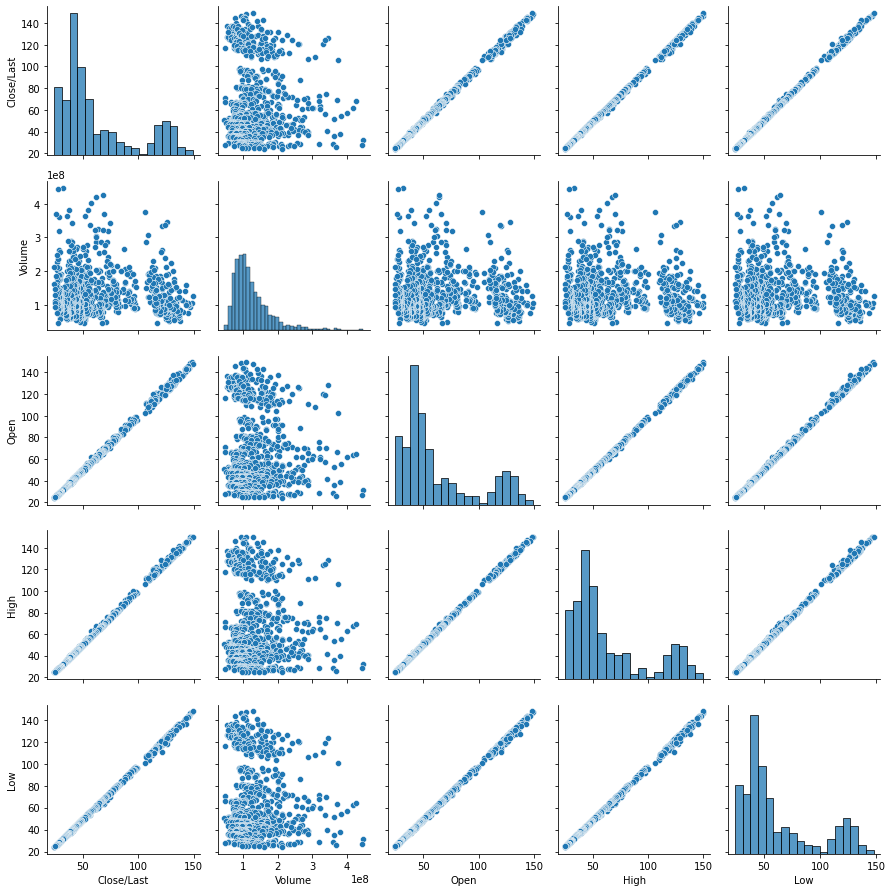

In [147]:
sns.pairplot(apple)
plt.tight_layout()

In [148]:

apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date',inplace=True)

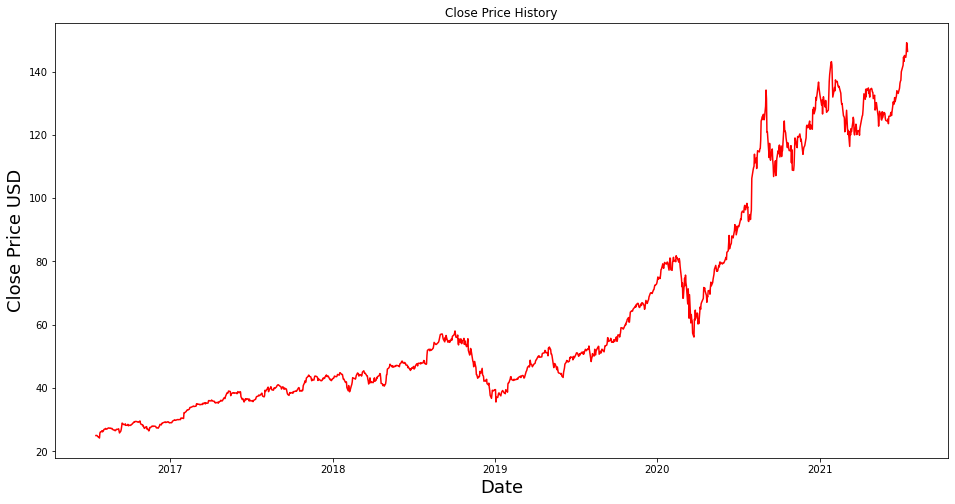

In [149]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(apple['Close/Last'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

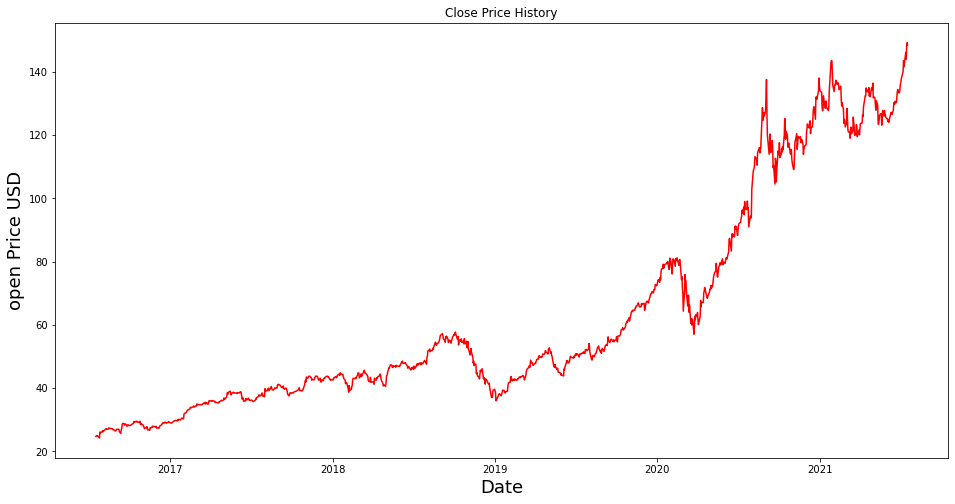

In [160]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(apple['Open'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('open Price USD', fontsize = 18)
plt.show()

In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(apple)
scaled_data

array([[0.97791647, 0.1189428 , 0.993762  , 0.9980878 , 0.98543454],
       [0.99463914, 0.15270452, 1.        , 1.        , 0.99522576],
       [1.        , 0.20304155, 0.99088292, 0.99657398, 1.        ],
       ...,
       [0.00656105, 0.14786786, 0.00639795, 0.00501952, 0.0067163 ],
       [0.00640102, 0.12345637, 0.00551823, 0.00406342, 0.00598802],
       [0.00632101, 0.24983745, 0.00383877, 0.00430245, 0.00445056]])

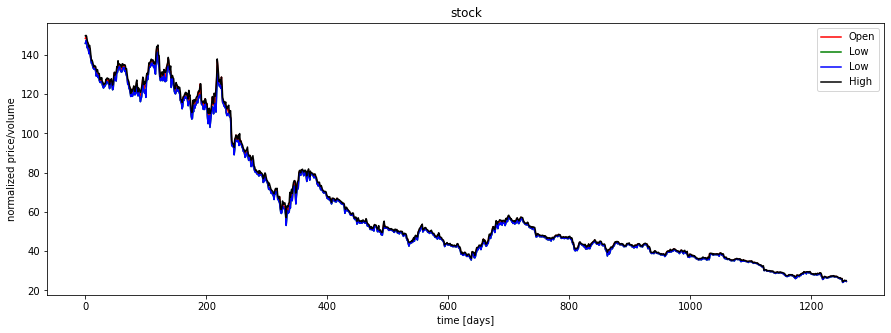

In [159]:
plt.figure(figsize=(15, 5));
plt.plot(apple.Open.values, color='red', label='Open')
plt.plot(apple.Low.values, color='green', label='Low')
plt.plot(apple.Low.values, color='blue', label='Low')
plt.plot(apple.High.values, color='black', label='High')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [181]:
apple.drop(['Volume'],1,inplace=True)

In [182]:
apple.head()

,Close/Last,Open,High,Low
Date,,,,
2021-07-16,146.39,148.46,149.76,145.88
2021-07-15,148.48,149.24,150.00,147.09
2021-07-14,149.15,148.10,149.57,147.68
2021-07-13,145.64,144.03,147.46,143.63
2021-07-12,144.50,146.21,146.32,144.00


In [183]:
apple.isnull().sum()

Close/Last    0
Open          0
High          0
Low           0
dtype: int64

<AxesSubplot:>

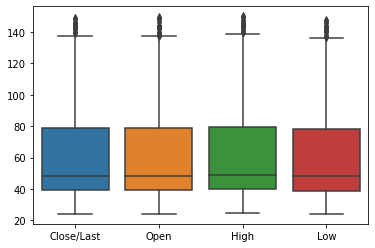

In [186]:
sns.boxplot(data=apple)

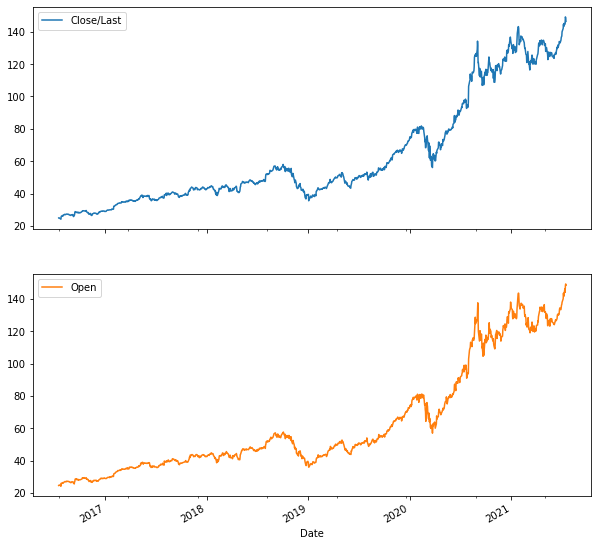

In [188]:
plots = apple[['Close/Last', 'Open']].plot(subplots=True, figsize=(10, 10))
plt.show()